# 데이터시각화 2022년 12월 28일의 뉴스 기사 분석 프로젝트

## 소개
빅카인즈(https://www.bigkinds.or.kr/)에서 본인의 작년 생일에 해당하는 날짜의 "경제" 키워드 뉴스 기사 데이터를 이용하여, 
워드 크라우드 시각화를 하고 이를 자세히 해석하여 분석 보고서를 작성함.

### ▼ 목차
1. 데이터 소개  
   1-1. 데이터 읽기  
   1-2. 데이터 상태 확인  
2. 데이터 전처리  
   2-1. 결측값 처리  
3. 그래프 시각화    	
   3-1. 워드 클라우드 시각화 및 분석
4. 데이터 분석

## 1. 데이터 소개

In [ ]:
# 필요한 패키지 설치
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

!pip install konlpy 
import konlpy # '명사'만 추출하기위해 knolpy를 임포트 했습니다.
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import urllib.request

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1-1. 데이터 읽기

In [ ]:
# 데이터 읽기
filename = '/content/drive/MyDrive/Colab_Notebooks/데이터 시각화/data/NewsResult_20221228-20221228.xlsx'
df = pd.read_excel(filename)
df.head()

,일자,키워드,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 2331,Unnamed: 2332,Unnamed: 2333,Unnamed: 2334,Unnamed: 2335,Unnamed: 2336,Unnamed: 2337,Unnamed: 2338,Unnamed: 2339,Unnamed: 2340
0,20221228,테슬라,상승기,선두,첫날,투자자들,173억,달러,22조,어치,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20221228,시대,리더십,딜로이트,컨설팅,기사,16:30:00,마켓,인사이트,게재,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20221228,스타트업,성장,빙하,고대,그리스인,로마인,위기,단어,소생,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20221228,부동산,대못,윤석열,정부,정부,과도,부동산,규제,손질,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20221228,巨野,권리,자유,직원,미만,사업장,특별,연장,근로제,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1-2. 데이터 상태 확인

In [ ]:
# 데이터 상태 확인
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(1694, 2341)
Index(['일자', '키워드', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 2331', 'Unnamed: 2332', 'Unnamed: 2333', 'Unnamed: 2334',
       'Unnamed: 2335', 'Unnamed: 2336', 'Unnamed: 2337', 'Unnamed: 2338',
       'Unnamed: 2339', 'Unnamed: 2340'],
      dtype='object', length=2341)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Columns: 2341 entries, 일자 to Unnamed: 2340
dtypes: int64(1), object(2340)
memory usage: 30.3+ MB
None
               일자
count      1694.0
mean   20221228.0
std           0.0
min    20221228.0
25%    20221228.0
50%    20221228.0
75%    20221228.0
max    20221228.0


## 2. 데이터 전처리

### 2-1. 결측값 처리  

먼저 정규표현식으로 특수문자를 제거하였습니다.
- [^가-힣] : 한글이 아닌 모든 문자를 뜻합니다.
- replace에 따라 [^가-힣] : 한글이 아닌 모든 문자를, ' ' : 빈칸으로 만들어줍니다.
- regex = True : 정규표현식 사용한다는 의미입니다.

In [ ]:
# 정규표현식으로 데이터 편집
df['키워드'] = df['키워드'].str.replace('[^가-힣]', ' ', regex = True)
df['키워드']

0                테슬라
1                 시대
2               스타트업
3                부동산
4                   
            ...     
1689              내년
1690           공연예술학
1691    인천청년벤처스타트업협회
1692           중소기업계
1693              고양
Name: 키워드, Length: 1694, dtype: object

In [ ]:
# 명사만 추출하겠습니다. (의미있는 데이터를 추출하기 위한 전처리 과정을 진행합니다)
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)- 품사 태깅을 진행했다.

# 키워드' 열에 명사 추출 적용
df['키워드'] = df['키워드'].astype(str).apply(lambda x: kkma.nouns(x))

print(df['키워드'])

0                                          [테슬라]
1                                           [시대]
2                                 [스타트, 스타트업, 업]
3                                          [부동산]
4                                             []
                          ...                   
1689                                        [내년]
1690                          [공연, 공연예술학, 예술, 학]
1691    [인천, 인천청년벤처스타트, 청년, 벤처, 스타트, 업, 업협회, 협회]
1692                                      [중소기업]
1693                                        [고양]
Name: 키워드, Length: 1694, dtype: object


In [ ]:
df = df.explode('키워드')
df

,일자,키워드,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 2331,Unnamed: 2332,Unnamed: 2333,Unnamed: 2334,Unnamed: 2335,Unnamed: 2336,Unnamed: 2337,Unnamed: 2338,Unnamed: 2339,Unnamed: 2340
0,20221228,테슬라,상승기,선두,첫날,투자자들,173억,달러,22조,어치,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20221228,시대,리더십,딜로이트,컨설팅,기사,16:30:00,마켓,인사이트,게재,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20221228,스타트,성장,빙하,고대,그리스인,로마인,위기,단어,소생,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20221228,스타트업,성장,빙하,고대,그리스인,로마인,위기,단어,소생,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20221228,업,성장,빙하,고대,그리스인,로마인,위기,단어,소생,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,20221228,업,ISA,출범,넥스트챌린지아시아,머리,인천청년벤처스타트업협회,ISA,연수구,송도,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1691,20221228,업협회,ISA,출범,넥스트챌린지아시아,머리,인천청년벤처스타트업협회,ISA,연수구,송도,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1691,20221228,협회,ISA,출범,넥스트챌린지아시아,머리,인천청년벤처스타트업협회,ISA,연수구,송도,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1692,20221228,중소기업,선정,2023년,사자성어,금석위개,중소기업중앙회,전경,중소기업계,사자성어,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # '키워드' 열을 소문자로 변환
# df['키워드'] = df['키워드'].str.lower()

# # 텍스트를 개별 단어로 분할
# df['키워드'] = df['키워드'].str.split()

In [ ]:
# '키워드'별로 그룹화하고 카운트를 계산
grouped_df = df.groupby('키워드').size().reset_index(name='count')

# 카운트 열을 기준으로 데이터 프레임을 내림차순으로 정렬
grouped_df = grouped_df.sort_values(by='count', ascending=False)

# 열 재정렬
grouped_df = grouped_df[['키워드', 'count']]

# '일자'(생일 일자) 열을 첫 번째 열로 추가합니다
grouped_df.insert(0, '일자', df['일자'].iloc[0])

# 인덱스 초기화
grouped_df = grouped_df.reset_index(drop=True)

grouped_df

# 시, 김, 군순으로 단어 수가 가장 많다. 근데 이것이 과연 의미있는 데이터일까? 시,김,군,전,도,만,구 등의 데이터를 발견할 수 있었다. 
# 단어가 한글자인 것은 제외하는 것으로 진행해보았다.

,일자,키워드,count
0,20221228,시,49
1,20221228,김,26
2,20221228,군,24
3,20221228,대통령,23
4,20221228,년,23
...,...,...,...
1607,20221228,사하구,1
1608,20221228,사하,1
1609,20221228,사진기사,1
1610,20221228,사진,1


In [ ]:
# 단일 문자 단어가 있는 행 제외
grouped_df = grouped_df[grouped_df['키워드'].str.len() > 1]
grouped_df

,일자,키워드,count
3,20221228,대통령,23
5,20221228,경기,23
6,20221228,한국,22
7,20221228,내년,22
8,20221228,정부,21
...,...,...,...
1607,20221228,사하구,1
1608,20221228,사하,1
1609,20221228,사진기사,1
1610,20221228,사진,1


## 3. 그래프 시각화


### 3-1. 워드 클라우드 시각화 및 분석

In [ ]:
# 워드 클라우드 시각화를 위해 데이터 프레임을 딕셔너리 형태로 변환했다.
dic_keyword = grouped_df.set_index('키워드').to_dict()['count']
dic_keyword

{'대통령': 23,
 '경기': 23,
 '한국': 22,
 '내년': 22,
 '정부': 21,
 '경제': 16,
 '인사': 13,
 '현대': 12,
 '청주': 12,
 '은행': 12,
 '강원': 11,
 '광주': 10,
 '삼성': 10,
 '인천': 10,
 '산업': 10,
 '기업': 10,
 '청주시': 10,
 '롯데': 10,
 '경남': 10,
 '테슬라': 9,
 '경기도': 9,
 '국민': 9,
 '이재명': 8,
 '미래': 8,
 '전자': 8,
 '충남': 8,
 '발전': 7,
 '경북': 7,
 '동해': 7,
 '서울': 7,
 '세종': 7,
 '대구': 7,
 '마트': 7,
 '삼성전자': 7,
 '전세': 7,
 '새해': 6,
 '강원도': 6,
 '그룹': 6,
 '울산시': 6,
 '인천시': 6,
 '재단': 6,
 '경수': 6,
 '공사': 6,
 '신한': 6,
 '울산': 6,
 '개월': 6,
 '전국': 6,
 '검찰': 6,
 '남부발전': 6,
 '지역': 6,
 '한국판': 6,
 '김경수': 6,
 '코로나': 6,
 '남부': 6,
 '무인기': 5,
 '협회': 5,
 '센터': 5,
 '미국': 5,
 '조선': 5,
 '수출': 5,
 '부산시': 5,
 '증권': 5,
 '전략': 5,
 '혁신': 4,
 '스타트': 4,
 '해양': 4,
 '시대': 4,
 '시민': 4,
 '농협': 4,
 '누리호': 4,
 '침체': 4,
 '행복': 4,
 '누리': 4,
 '도시': 4,
 '고양': 4,
 '음성군': 4,
 '음성': 4,
 '환경부': 4,
 '푸드': 4,
 '활동': 4,
 '중국': 4,
 '요금': 4,
 '회계': 4,
 '푸틴': 4,
 '신용': 4,
 '기사': 4,
 '제주': 4,
 '제약': 4,
 '금리': 4,
 '세계': 4,
 '건설': 4,
 '태전략': 4,
 '생명': 4,
 '이민': 4,
 '연금': 4,
 '문화': 4,

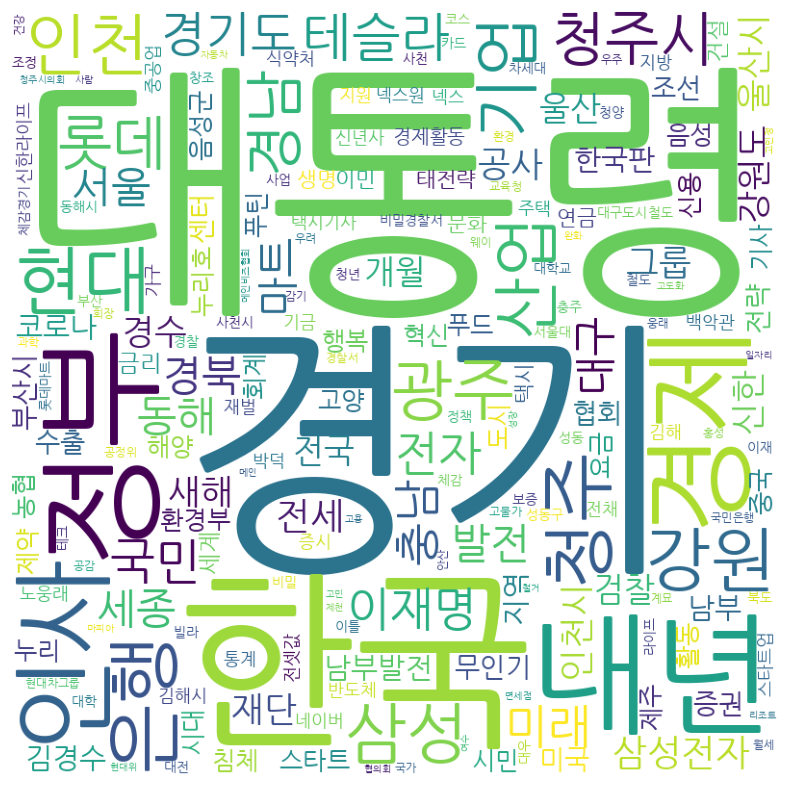

In [ ]:
# 본격적으로 워드클라우드 함수를 사용하여 시각화 하겠습니다.

# 나눔 폰트 경로 지정
font_path = '/content/drive/MyDrive/Colab_Notebooks/데이터 시각화/data/NanumGothic.ttf'
wc = WordCloud(font_path= font_path, random_state = 43, width = 400,
               height = 400, background_color = 'white', scale=2.0, max_font_size=250)

gen = wc.generate_from_frequencies(dic_keyword)
plt.figure(figsize = (10, 10))
plt.axis('off') # 축 없애기
plt.imshow(gen)

# wc = WordCloud(font_path= font_path, width=800, height=800, scale=2.0, max_font_size=250)

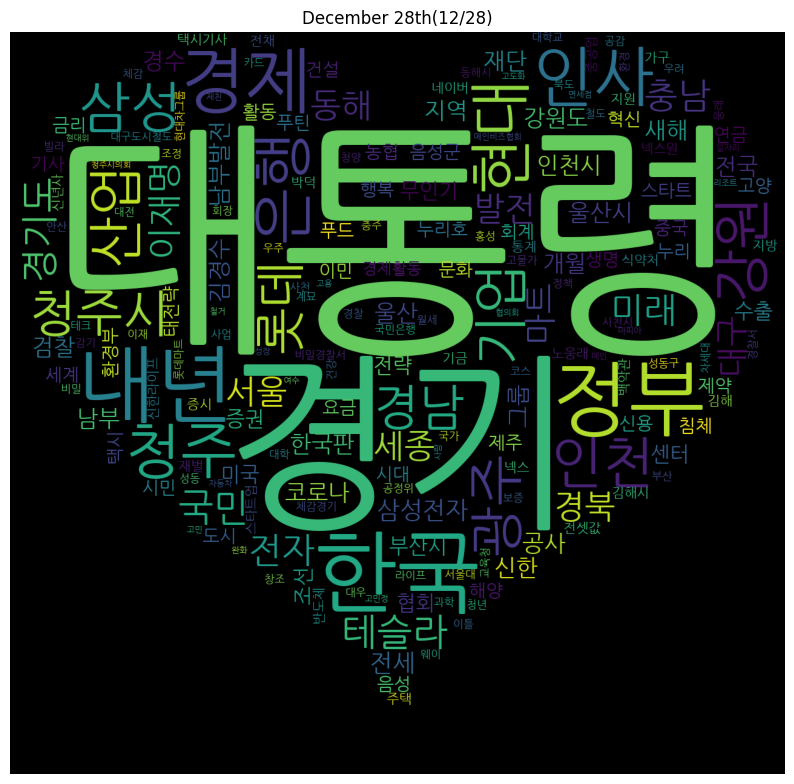

In [ ]:
# 좀 더 이쁜 모양을 만들겠습니다. 
import PIL
icon = PIL.Image.open('/content/drive/MyDrive/Colab_Notebooks/데이터 시각화/data/heart.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img = np.array(img)

# 나눔 폰트 경로 지정
font_path = '/content/drive/MyDrive/Colab_Notebooks/데이터 시각화/data/NanumGothic.ttf'
wc = WordCloud(font_path= font_path, random_state = 43, 
               width = 400, height = 400, mask = img, 
              scale=2.0, max_font_size=250)

gen = wc.generate_from_frequencies(dic_keyword)

plt.figure(figsize = (10, 10))
plt.title("December 28th(12/28)")
plt.axis('off') # 축 없애기
plt.imshow(gen)

## 4. 데이터 분석
시각화한 워드 클라우드 분석을 해보았습니다. 2022년 12월 28일에는 대표적으로 대통령이 가장 큰 이슈를 가지고 있습니다. 그리고 차례대로 경기, 정부, 내년, 한국, 경제, 삼성, 인사 순으로 많은 이슈를 가지고 있습니다. 해당 분석 내용을 토대로 2022년 12월 28일 기사를 찾아 보았습니다. 대통령에 관련된 내용으로는 국방에 관한 문제점이 발생하고 있었습니다. 바로 윤석열 대통령이 우리 군의 북한 무인기 격추 실패와 관련하여 이종섭 국방부 장관에게 "그동안 도대체 뭐 한 거냐"며 강하게 질책을 한 기사인데요. 윤 대통령은 대통령실에서 국무회의에 앞서 이 장관으로부터 무인기 대응 관련 보고를 받고 이같이 언급한 것입니다. 북한 무인기가 경기도에 침범한 것인데요. 분석에서도 보면 알 수 있듯이 경기도는 매우 뜨거운 이슈를 가지고 있고 무인기 이슈 또한 가지고 있습니다. 12월 28일에는 북한 무인기가 경기도에 영공 침범과 우리 군이 격추 실패 상황이 한참 뜨고 있었던 때였음을 알 수 있습니다. 그래서 이에 대한 기사에는 정부의 여러가지 정책 이야기가 들리고 "새해에는 여러 정세나 사오항에서 변화가 많을 것" 이라는 언급이 굉장히 많습니다. 분석 결과에도 그래서 한국, 내년, 정부, 새해 등이 큰 이슈를 가지는 것을 또다시 확인할 수 있었습니다. 다음으로 분석에서 높은 이슈를 가진 삼성에 대한 기사입니다. 삼성 또한 매우 뜨거운 관심과 이슈를 가지고 있는데요. 삼성이 CES 2023서 'C랩 전시관'을 운영한다는 것인데요. 삼성전자의 C랩 스타트업들이 'CES 2023 혁신상'에서 역대 최다 수상기록을 경신했다는 커다란 이야기였습니다. 또 다른 기사로는 인천의 인천터미널점이 내년에 폐점을 검토 중인 기사가 있습니다. 역시나 분석 결과에서 봤듯이 롯데, 롯데마트, 인천이 큰 이슈를 가지고 있습니다. 롯데 측이 밝힌 인천터미널점의 페점 이유는 롯데백화점 인천점의 MD(Mrchandise) 변경 때문이라고 합니다. MD 변경은 새로운 브랜드가 들어오거나 기존 브랜드가 확장되는 등 브랜드 변경의 개념입니다. 이역시 데이터 분석 결과에서 이슈들이 있음을 확인할 수 있습니다. 
다음 기사로는 신한은행, 임원 인사, 조직 개편을 시행한다는 내용입니다. 확실히 대기업들의 이슈들은 핫하다는 것을 알 수 있었습니다. 그래서 기업 키워드가 큰 관심을 모았던 것임을 알 수 있었습니다. 해당 기사 데이터 분석 결과로도 신한, 인사, 은행 등의 키워드가 큰 이슈를 띠고 있었습니다. 기사 내용은 신한 은행이 중구 세종대로 소재 본점에서 이사회를 개최해 경영진을 선임하고 조직 개편을 하겠다는 내용입니다. 2022년 12월 28일에는 코로나 또한 관심을 모았는데요. 미국이 중국에서 들어오는 입국자 혹은 이민한 사람들에게 적용할 새로운 코로나19 방역대책을 검토한다는 내용입니다. 그래서 워드 클라우드 분석에도 코로나, 이민, 미국 등의 키워드가 분포한 것을 확인할 수 있었습니다. 이처럼 2022년 12월 28일 워드 클라우드 시각화를 통해 2022년 12월 28일의 큰 이슈를 가진 경제 관련 기사들을 쉽고 빠르게 찾아볼 수 있었습니다. 